<a href="https://colab.research.google.com/github/amir-asari/SEBB4083-Assignment2023/blob/main/Group_1_Assignment(LogisticRegression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Group Assignment 2 (5%)
### Total marks: 30

### Group No.:1

###Group Members:
1)Kevin Ng Zhi Hao A19EB0016

2)FADLIN AMIRA BINTI MOHD FAIRUZ A19EB5221

3)AZKA WILLIAN MUHAMMAD A19EB0074

4)DASHALINI A/P KALAICHELVAN A19EB0007

5)WASFI SABER AHMED A19EB0087

6)MALANIKA A/P BALAKRISHNAN A19EB0020

In this assignment, you need to apply logistic regression using Prima Indian Diabetis dataset. Note: You can use any appropriate Python libraries for this assignment, such as pandas, numpy, scikit-learn, matplotlib, and seaborn.

####(Step 1) Load the Pima Indian Diabetes dataset into Python using pandas library [2 marks]

In [1]:
from google.colab import files
import io
uploaded = files.upload()
import pandas as pd
df_ori = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

Saving diabetes.csv to diabetes.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

####(Step 2) Preprocess the data to clean, remove null values, and normalize if needed. [4 marks]

> Indented block



In [3]:
pd.concat([df_ori.head(), df_ori.tail()])


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
df_ori.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [5]:
df = df_ori.copy(deep=True)
df_removed = df.drop('BloodPressure', axis=1,inplace=True)
df_removed = df.drop('SkinThickness', axis=1,inplace=True)
df_removed = df.drop( 'Pregnancies', axis=1,inplace=True)

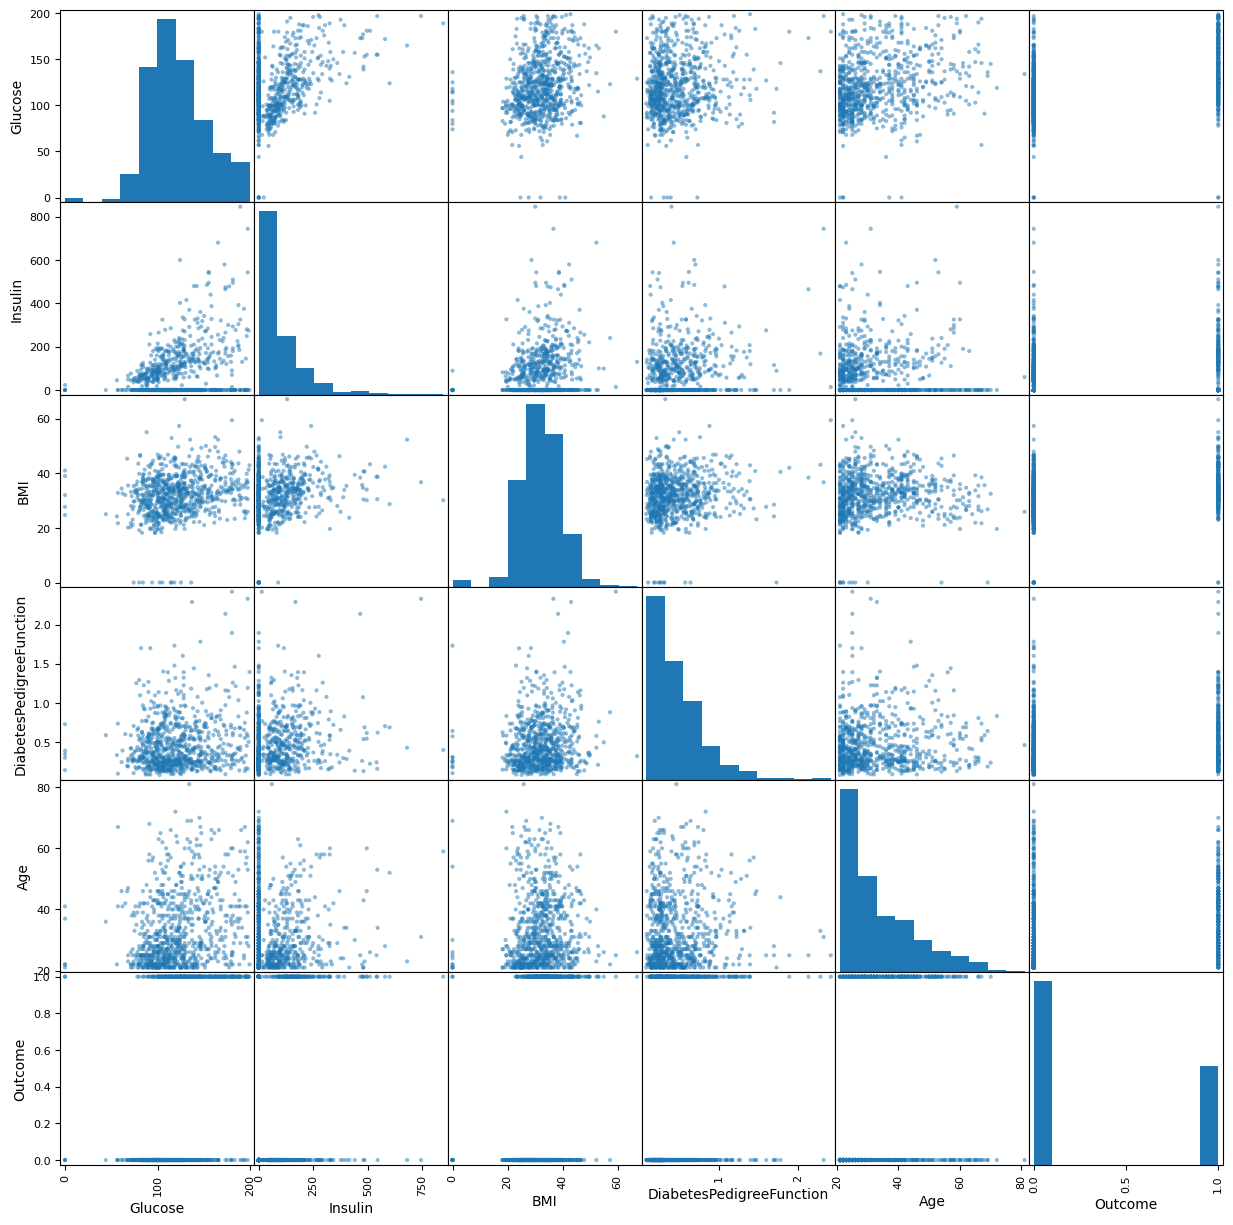

In [6]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(df, figsize=(15,15))
plt.savefig('scatter_prostate.png')
plt.show()

In [9]:
corr = df.corr()
corr.style.background_gradient()

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.331357,0.221071,0.137337,0.263514,0.466581
Insulin,0.331357,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.221071,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.137337,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.263514,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.466581,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
df_removed.describe().loc[['mean', 'std']]

AttributeError: ignored

####(Step 3) Split the dataset into training and testing subsets. Use 1) 50:50; 2)70:30; 3)80:20; and 4)90:10 ratio of training to testing data. [4 marks]

In [10]:
X = df.iloc[:,[0,1,2,3,4]] # Age, EstimatedSalary and Male
X.head()

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,0,33.6,0.627,50
1,85,0,26.6,0.351,31
2,183,0,23.3,0.672,32
3,89,94,28.1,0.167,21
4,137,168,43.1,2.288,33


In [11]:
y = df.iloc[:, -1]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.84832379, -0.69289057,  0.20401277,  0.46849198,  1.4259954 ],
       [-1.12339636, -0.69289057, -0.68442195, -0.36506078, -0.19067191],
       [ 1.94372388, -0.69289057, -1.10325546,  0.60439732, -0.10558415],
       ...,
       [ 0.00330087,  0.27959377, -0.73518964, -0.68519336, -0.27575966],
       [ 0.1597866 , -0.69289057, -0.24020459, -0.37110101,  1.17073215],
       [-0.8730192 , -0.69289057, -0.20212881, -0.47378505, -0.87137393]])

In [14]:
from sklearn.model_selection import train_test_split
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X, y, test_size=0.50, random_state=1)

print(X_train_50.shape)
print(X_test_50.shape)
print(y_train_50.shape)
print(y_test_50.shape)

(384, 5)
(384, 5)
(384,)
(384,)


In [15]:
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.30, random_state=1)

print(X_train_70.shape)
print(X_test_30.shape)
print(y_train_70.shape)
print(y_test_30.shape)

(537, 5)
(231, 5)
(537,)
(231,)


In [ ]:
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.20, random_state=1)

print(X_train_80.shape)
print(X_test_20.shape)
print(y_train_80.shape)
print(y_test_20.shape)

In [17]:
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X, y, test_size=0.10, random_state=1)

print(X_train_90.shape)
print(X_test_10.shape)
print(y_train_90.shape)
print(y_test_10.shape)

(691, 5)
(77, 5)
(691,)
(77,)


####(Step 4) Perform logistic regression on the training data and show the training accuracy. [4 marks]

In [18]:
from sklearn.linear_model import LinearRegression
print(LinearRegression.__doc__[1:45])

    Ordinary least squares Linear Regression


In [19]:
classifier = LogisticRegression()
classifier.fit(X_train_50, y_train_50)

LogisticRegression()

In [20]:
classifier_2 = LogisticRegression()
classifier_2.fit(X_train_70, y_train_70)

LogisticRegression()

In [21]:
classifier_3 = LogisticRegression()
classifier_3.fit(X_train_80, y_train_80)

LogisticRegression()

In [22]:
classifier_4 = LogisticRegression()
classifier_4.fit(X_train_90, y_train_90)

LogisticRegression()

####(Step 5) Use the trained model to make predictions on the testing data. [4 marks]

In [23]:
y_pred_1 = classifier.predict(X_test_50)
result = pd.DataFrame({'Actual' : y_test_50, 'Predicted' : y_pred_1})
result

,Actual,Predicted
285,0,0
101,0,0
581,0,0
352,0,0
726,0,0
...,...,...
574,0,0
379,0,0
191,0,0
414,1,0


In [24]:
y_pred_2 = classifier.predict(X_test_30)
result = pd.DataFrame({'Actual' : y_test_30, 'Predicted' : y_pred_2})
result

,Actual,Predicted
285,0,0
101,0,0
581,0,0
352,0,0
726,0,0
...,...,...
241,0,0
599,0,0
650,0,0
11,1,1


In [25]:
y_pred_3 = classifier.predict(X_test_20)
result = pd.DataFrame({'Actual' : y_test_20, 'Predicted' : y_pred_3})
result

,Actual,Predicted
285,0,0
101,0,0
581,0,0
352,0,0
726,0,0
...,...,...
563,0,0
318,0,0
154,1,1
684,0,0


In [26]:
y_pred_4 = classifier.predict(X_test_10)
result = pd.DataFrame({'Actual' : y_test_10, 'Predicted' : y_pred_4})
result

,Actual,Predicted
285,0,0
101,0,0
581,0,0
352,0,0
726,0,0
...,...,...
699,0,1
680,0,0
754,1,1
23,1,0


####(Step 6) Evaluate the model's performance using appropriate metrics such as accuracy, true positive rate and true negative rate. [8 marks]

In [27]:
from sklearn.metrics import confusion_matrix
cf_matrix_1 = confusion_matrix(y_test_50, y_pred_1)
cf_matrix_1

array([[222,  24],
       [ 62,  76]])

In [28]:
cf_matrix_2 = confusion_matrix(y_test_30, y_pred_2)
cf_matrix_2

array([[132,  14],
       [ 37,  48]])

In [29]:
cf_matrix_3 = confusion_matrix(y_test_20, y_pred_3)
cf_matrix_3

array([[89, 10],
       [25, 30]])

In [30]:
cf_matrix_4 = confusion_matrix(y_test_10, y_pred_4)
cf_matrix_4

array([[43,  5],
       [12, 17]])

####(Step 7) Visualize the model's performance using appropriate charts such as a confusion matrix. [4 marks]

0.7760416666666666

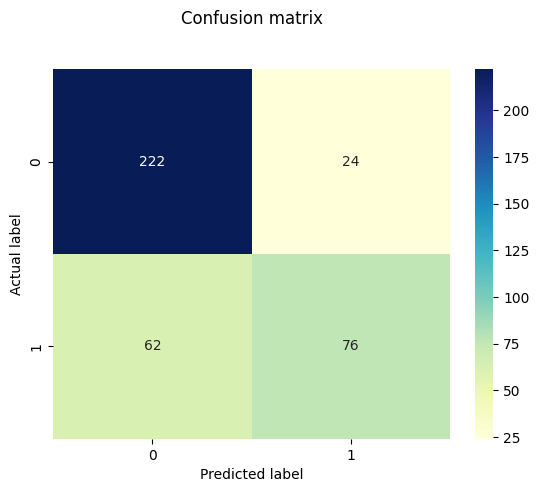

In [31]:
from sklearn.metrics import confusion_matrix

sns.heatmap(pd.DataFrame(cf_matrix_1), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
Accuracy = (222 + 76)/(222+24+62+76)
Accuracy
# 0.8083333333333333

# Also same result from sklearn accuracy_score
from sklearn.metrics import accuracy_score

accuracy_score(y_test_50,y_pred_1)

0.7792207792207793

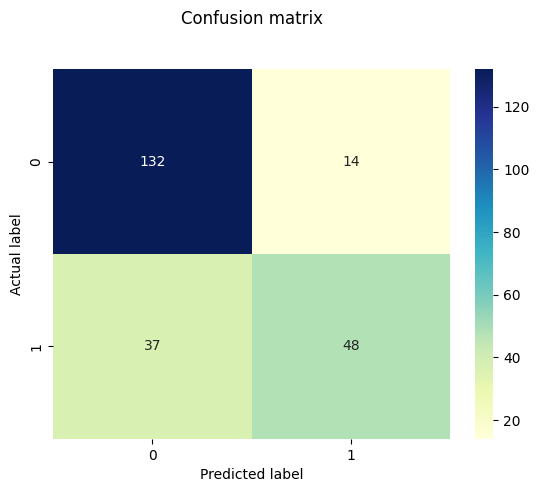

In [32]:
sns.heatmap(pd.DataFrame(cf_matrix_2), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
Accuracy = (132 + 48)/(132+48+14+37)
Accuracy

# Also same result from sklearn accuracy_score
from sklearn.metrics import accuracy_score

accuracy_score(y_test_30,y_pred_2)

0.7727272727272727

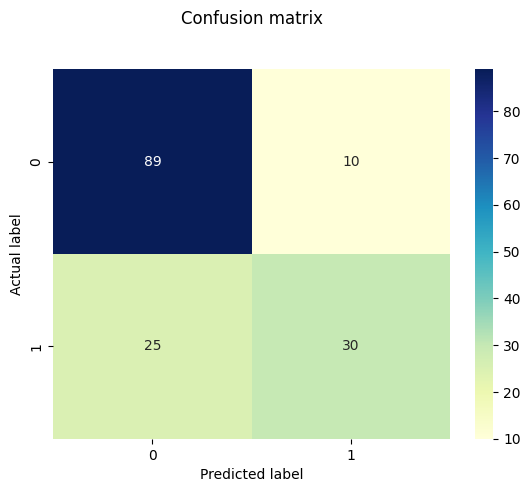

In [33]:
sns.heatmap(pd.DataFrame(cf_matrix_3), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
Accuracy = (89+ 30)/(89+30+10+25)
Accuracy

# Also same result from sklearn accuracy_score
from sklearn.metrics import accuracy_score

accuracy_score(y_test_20,y_pred_3)

0.7792207792207793

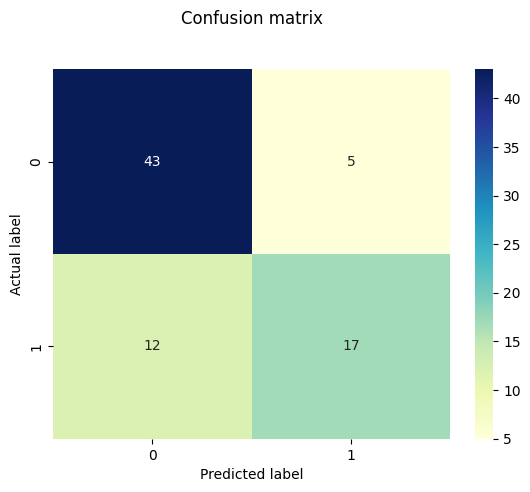

In [34]:
sns.heatmap(pd.DataFrame(cf_matrix_4), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
Accuracy = (43 + 17)/(12+17+43+5)
Accuracy

# Also same result from sklearn accuracy_score
from sklearn.metrics import accuracy_score

accuracy_score(y_test_10,y_pred_4)